## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [5]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=13):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
#     feat = [x/25]
#     for i in range(2, feature_num+1):
#         feat.append((x/25)**i)
#     ret = np.concatenate(feat, axis=1)
#     ret = np.concatenate([((x - 25/2)/12) ** k for k in range(1, feature_num + 1)], axis=1)
    ret = np.concatenate([((x-12.5)/12.5) ** k for k in range(1, feature_num + 1)], axis=1)
    return ret


def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(0, 25, feature_num)
#     print(centers)
    width = 1.0 * (centers[1] - centers[0])
#     print(width)
    x = np.expand_dims(x, axis=1)
#     print([x]*feature_num)
    x = np.concatenate([x]*feature_num, axis=1)
#     print(x)
    out = (x-centers)/width
#     print(out)
    ret = np.exp(-0.5 * out ** 2)
    return ret

# gaussian_basis([1,2,3,4,5],5)

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [6]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    base = 1 
    if base == 0:
        basis_func = identity_basis
    elif base == 1:
        basis_func = multinomial_basis
    else:
        basis_func = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    method = 0
    
    w = np.random.rand(phi.shape[1], 1)
    # 最小二乘法
    if method == 0:
        # w = np.linalg.inv(np.dot(phi.T,phi)).dot(phi.T).dot(y_train)
        w = np.linalg.inv(phi.T @ phi) @ phi.T @ y_train
    else:
        # 梯度下降
        identity_param = [1000, 0.01, len(y_train), 1]
        multinomial_param = [1000000, 0.1, len(y_train), 1]
        gaussian_param = [100000, 0.01, len(y_train), 1]
        
        epoch, lr, batch_size, lr_decay = multinomial_param
                
        loss = []
        for i in range(epoch):
            dw = phi.T @ (np.expand_dims(y_train, axis=1) - phi @ w)
            w += dw * lr / batch_size
            lr *= lr_decay
        
            loss.append(np.sqrt(np.mean(np.abs(y_train.reshape((-1, 1)) - phi @ w) ** 2)))
        
        plt.plot(range(epoch), loss)
        plt.show()
        
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：0.2
预测值与真实值的标准差：0.2


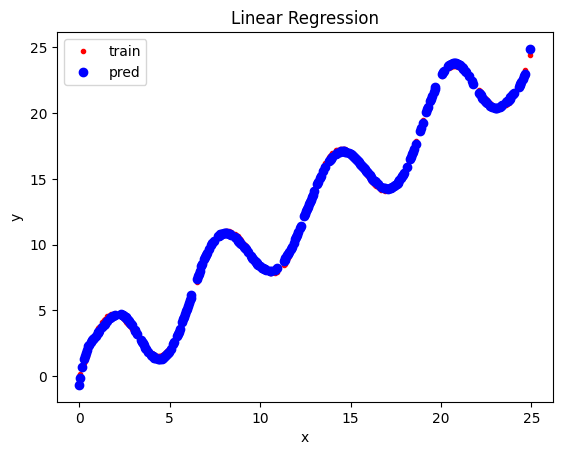

In [7]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    mode = 0 # train
#     mode = 1 # test
    if mode == 0:
        tag = 'train'
        plt.plot(x_train, y_train, 'ro', markersize=3)
        plt.plot(x_train, y_train_pred, 'bo')
    else:
        tag = 'test'
        plt.plot(x_test, y_test, 'ro')
        plt.plot(x_test, y_test_pred, 'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend([tag, 'pred'])
    plt.show()